<a href="https://colab.research.google.com/github/hasanzeynal/TensorFlow-Developer-Certificate/blob/main/08_Time_Series_Forecasting/time_series_analysis_and_forecasting_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore all warnings
import warnings
warnings.filterwarnings(action = 'ignore')

#What are we gonna cover in thos section?
* Downloading and formating time series data
* Writing preprocessing function to prepare our time series data
* Setting up multiple time series modeling experiments
* Building a multivariate model to take multivariate time series data
* Replicating N-Beats algorithm using TensorFlow
* Making forecast with the prediction interval
* Demonstrating why time series forcasting can be BS with the TURKEY problem🦃

In [ ]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-07-27 02:44:52--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222036 (217K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 216.83K  --.-KB/s    in 0.03s   

2023-07-27 02:44:52 (7.00 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [222036/222036]



In [2]:
#read the csv file which consist of bitcoin prices
df = pd.read_csv('/content/drive/MyDrive/datasets/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col=['Date'])
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [3]:
#changing the names of column names
df.rename(columns={'Currency':'currency',
                   'Closing Price (USD)':'closing_price_USD',
                   '24h Open (USD)':'24h_open_USD',
                   '24h High (USD)':'24h_high_USD',
                   '24h Low (USD)':'24h_low_USD'},inplace=True)

In [4]:
df.columns

Index(['currency', 'closing_price_USD', '24h_open_USD', '24h_high_USD',
       '24h_low_USD'],
      dtype='object')

In [5]:
df['currency'].value_counts()

BTC    2787
Name: currency, dtype: int64

# Visualising

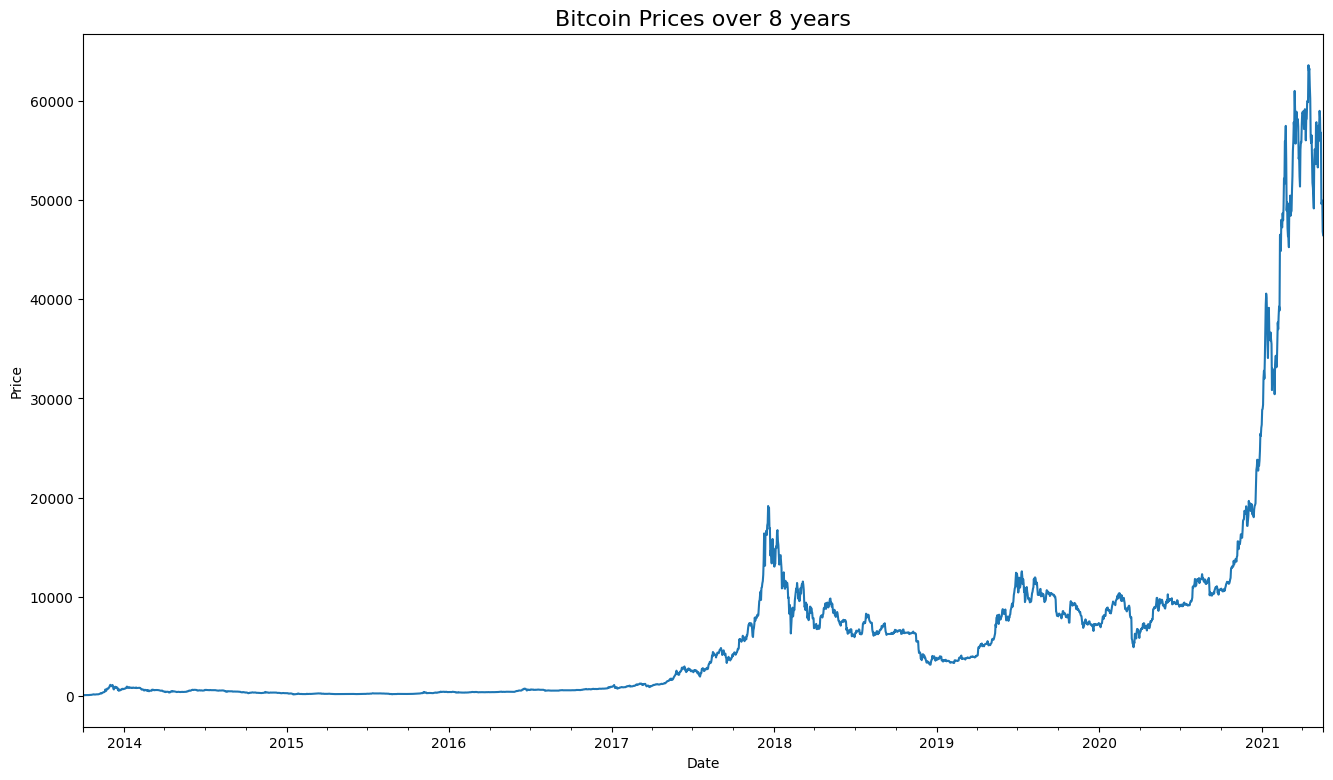

In [6]:
#visulise prices of btc's
plt.figure(figsize = (16,9))
df['24h_open_USD'].plot()
#set the title, x and y labels
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Prices over 8 years',
          fontsize = 16)
#plot the plot
plt.show()

# Create train and test splits

In [22]:
#let's create train and test splits(80% / 20%)
train_size = len(df) * 0.8
test_size = len(df) * 0.2
y_train = df['24h_open_USD'][:int(round(train_size,0))]
X_train = df.index[:int(round(train_size,0))]
y_test = df['24h_open_USD'][int(round(train_size,0)):]
X_test = df.index[int(round(train_size,0)):]

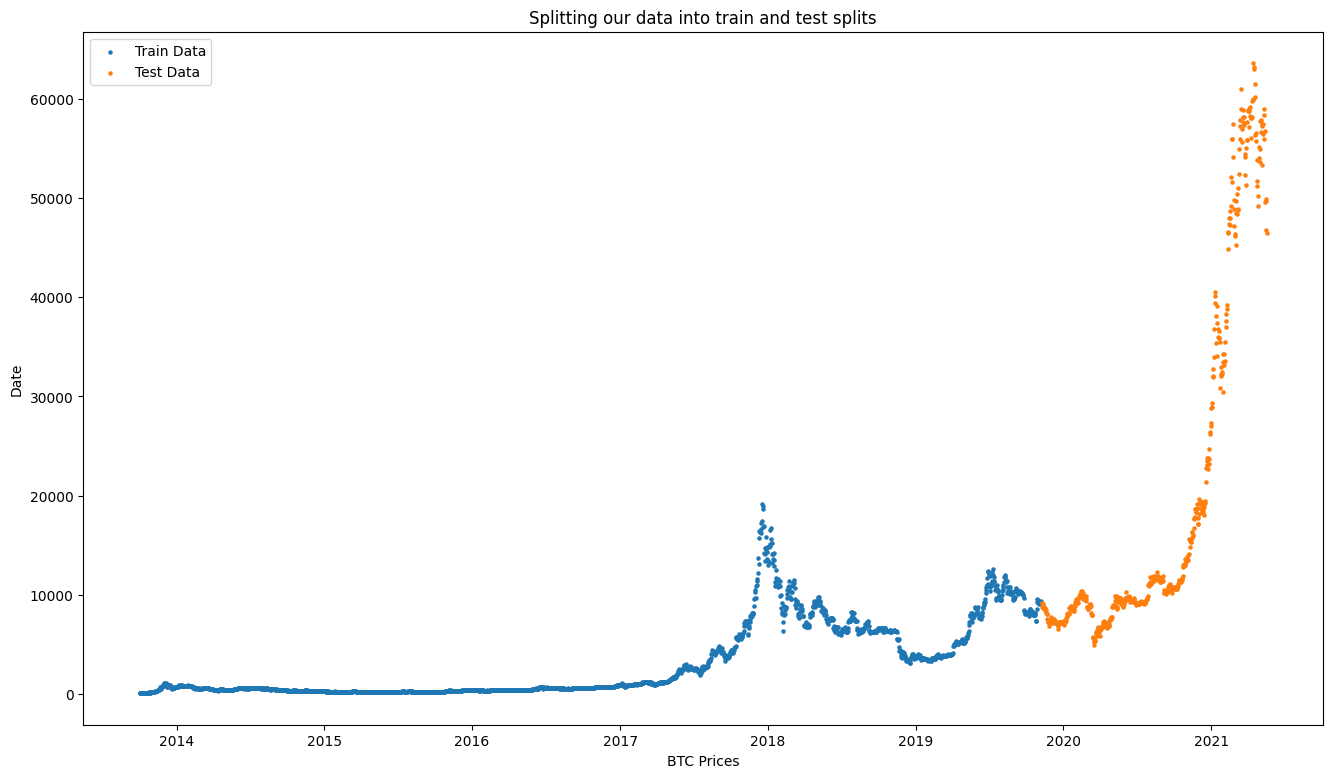

In [23]:
#visualise our train and test splits
plt.figure(figsize=(16, 9))
plt.scatter(X_train,y_train,s = 5, label='Train Data')
plt.scatter(X_test,y_test,s = 5, label='Test Data')
plt.xlabel('BTC Prices')
plt.ylabel('Date')
plt.title('Splitting our data into train and test splits')
plt.legend()
plt.show()

## There are some sort of models that we are gonna experiment how they work:
###Terms:
* **horizon** = number of timestepms that we are gonna predict
* **window size** = number of timestemps we are gonna use to predict horizon
### Models:
1. Naive Model(Baseline)
2. Dense Model, horizon= 1, window= 7
3. Same as Model 1
4. Same as Model 1
5. Conv1D
6. LSTM
7. Same as Model 1(bit with multivariate data)
8. N-BEATS Algorithm
9. Ensemble(Multiple models stack together)
10. Future Prediction Model
11. Same as Model 1(but with turkey🦃 data intruduced)